In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Visualização de dados - População Mundial

### Carregar dados e Visualizar as cinco primeiras linhas 

In [2]:
df = pd.read_csv('../datasets/world_population.csv')
df.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


### Visualizar os continentes

In [3]:
df.Continent.unique()

array(['Asia', 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

### Pré-processar coluna continente: Trocar North America e South America por America

In [4]:
for regiao in ['South', 'North']:
    mask = df.Continent == f'{regiao} America'
    df.loc[mask, 'Continent'] = df[mask]['Continent'].str.replace(f"{regiao}", '').str.lstrip()
    
df.Continent.unique()

array(['Asia', 'Europe', 'Africa', 'Oceania', 'America'], dtype=object)

## Plot

### Brazil Population

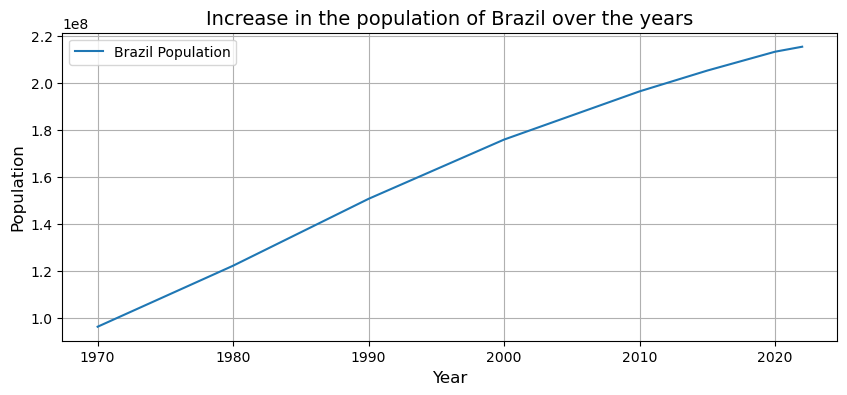

In [5]:
mask = df['Country'] == 'Brazil'
brazil_data = df[mask]

def get_year_population(df, start, end):
    year = list(map(lambda x: int(x.replace("Population", "")), df.columns.to_list()[start:end:]))
    population = df.iloc[::, start:end:].values.reshape((8, -1))
    
    return year, population

year, population = get_year_population(brazil_data, 5, 13)

fig = plt.figure(figsize=(10, 4))
plt.plot(year, population, label='Brazil Population')
plt.xlabel('Year', size=12)
plt.ylabel('Population', size=12)
plt.title('Increase in the population of Brazil over the years', size=14)
plt.grid()
plt.legend()
plt.show()

### Continents Population

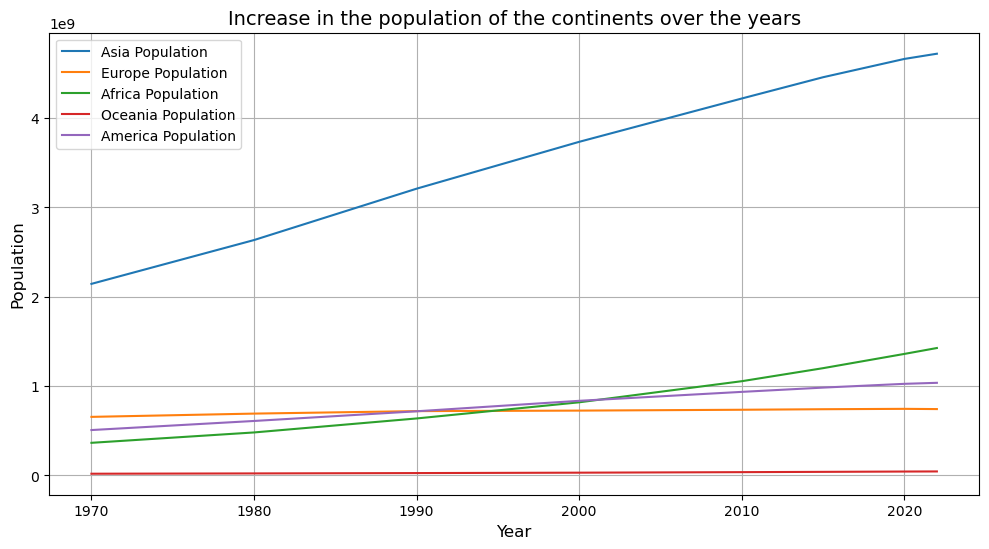

In [6]:
continents = df.Continent.unique()
df_grouped = df.groupby('Continent', as_index=False).sum()

fig = plt.figure(figsize=(12, 6))

for continent in continents:
    mask = df_grouped['Continent'] == f'{continent}'
    df_continent = df_grouped[mask]
    
    year, population = get_year_population(df_continent, 2, 10)
    
    plt.plot(year, population, label=f'{continent} Population')
    plt.xlabel('Year', size=12)
    plt.ylabel('Population', size=12)
    plt.title(f'Increase in the population of the continents over the years', size=14)
    plt.grid()
    plt.legend()
plt.show() 

## Pie

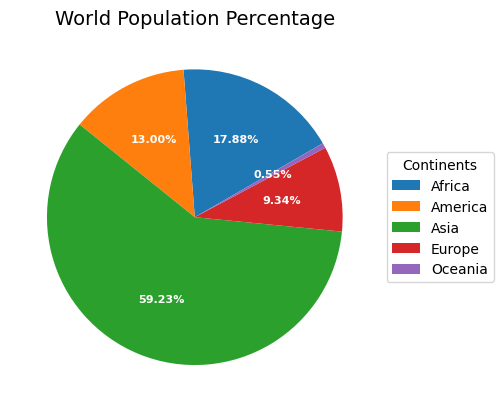

In [7]:
continents = df_grouped['Continent'].to_list()
population_percentage = df_grouped['World Population Percentage']

fig = plt.figure()

plt.title("World Population Percentage", size=14)
wedges, texts, autotexts = plt.pie(population_percentage, autopct="%.2f%%", startangle=30,
                                   textprops={'color':'w'})

plt.setp(autotexts, size=8, weight='bold')
plt.legend(wedges, continents, loc='center left', title='Continents', bbox_to_anchor=[1, 0, 0.5, 1])
plt.show()

## Bar

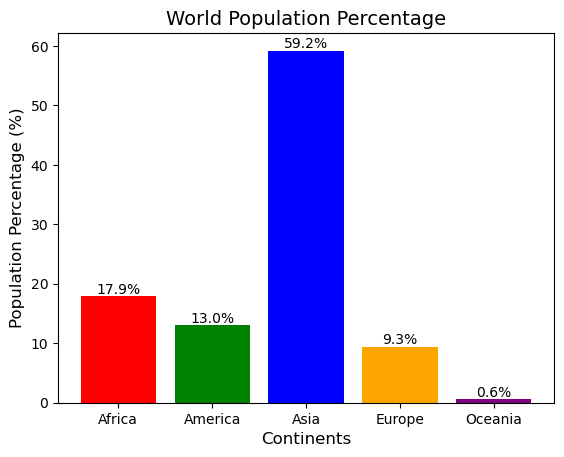

In [8]:
fig = plt.figure()

colors = ['red', 'green', 'blue', 'orange', 'purple']

plt.title("World Population Percentage", size=14)
bar_label = plt.bar(continents, population_percentage, color=colors)
plt.xlabel("Continents", size=12)
plt.ylabel("Population Percentage (%)", size=12)
plt.bar_label(bar_label, fmt="%.01f%%", size=10, label_type="edge")
plt.show()

## Barh

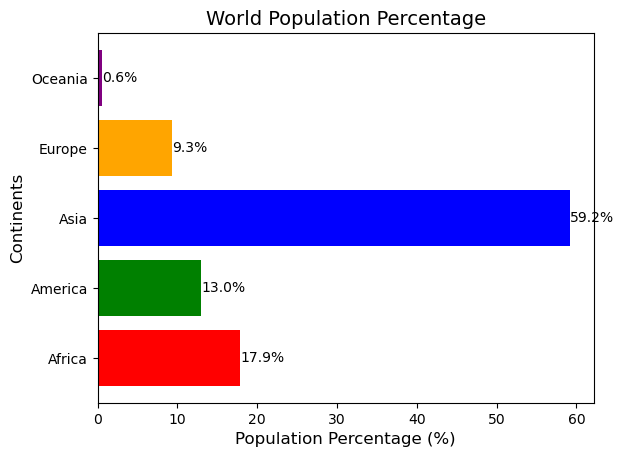

In [9]:
fig = plt.figure()


colors = ['red', 'green', 'blue', 'orange', 'purple']

plt.title("World Population Percentage", size=14)
bar_label = plt.barh(continents, population_percentage, color=colors)
plt.ylabel("Continents", size=12)
plt.xlabel("Population Percentage (%)", size=12)
plt.bar_label(bar_label, fmt="%.01f%%", size=10, label_type="edge")
plt.show()

## Boxplot

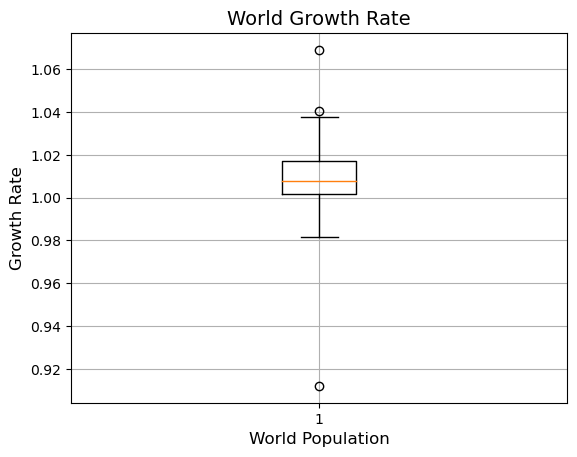

In [10]:
fig = plt.figure()

plt.title("World Growth Rate", size=14)
plt.boxplot(df['Growth Rate'])
plt.xlabel("World Population", size=12)
plt.ylabel('Growth Rate', size=12)
plt.grid()
plt.show()

## Hist

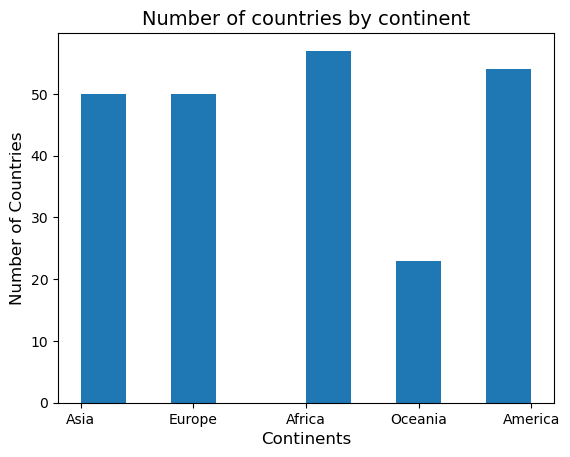

In [11]:
fig = plt.figure()

plt.title("Number of countries by continent", size=14)
plt.hist(df['Continent'])
plt.ylabel("Number of Countries", size=12)
plt.xlabel("Continents", size=12)
plt.show()